# 1. Rede Neural Preditiva 

In [1]:
import random

def transformarSaida(saida):
    pp=saida
    
#     pp[0]=saida[0]*180
#     pp[1]=saida[1]*180
#     pp[2]=saida[2]*180
#     pp[3]=saida[3]*180
#     pp[4]=saida[4]*180
#     pp[5]=saida[5]*180
#     pp[6]=saida[6]*180
#     pp[7]=saida[7]*180
#     pp[8]=saida[8]*180
#     pp[9]=saida[9]*180
#     pp[10]=saida[10]*180
#     pp[11]=saida[11]*180
    
#     pp[12]=saida[12]*60 -30
#     pp[13]=saida[13]*60 -30
#     pp[14]=saida[15]*60 -30
    
#     pp[15]=saida[15]*20 -10
#     pp[16]=saida[16]*20 -10
#     pp[17]=saida[17]*20 -10    

#     pp[18]=saida[18]*100   
    
#     pp[19]=saida[19]*100
    
#     pp[20]=saida[20]*360-180  
#     pp[21]=saida[21]*360-180
#     pp[22]=saida[22]*360-180
    
    pp[0]=saida[0]*360-180  
    pp[1]=saida[1]*360-180
#     pp[2]=saida[2]*360-180  
    
    return pp

## 1.1 Ler, tratar e organizar os dados de treinamento

In [2]:
import torch, torchvision
import numpy as np
import time
def buscaLinha(arq,i):
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            if(cont==i):
                linha=linha.replace("{","") #retira a chave da linha
                linha=linha.replace("}","")# retira a chave da linha
                return linha
def tratarX(x):
    xLista=[]
    xTratado=x.split()
    cont=0
    
    for k in xTratado:
        if(cont>2):
            xLista.append(k)
        cont=cont+2
    
    linhaString=""
    
    for k in xLista:
        linhaString=linhaString+k+" "
    return linhaString
    
    
def gerarDadosTrain(arq):#Cria dados de treinamento xTrain e yTrain a partir de um arquivo
    xTrain=[]
    yTrain=[]
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    tamanhox=0
    tamanhoy=0
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            linha=linha.replace("{","") #retira a chave da linha
            linha=linha.replace("}","")# retira a chave da linha
            #print("Linha: "+ str(cont))# exibe o numero da linha
            #print(linha)#Exibe a linha
            if(cont>=4):#se a linha for 4 ou maior, ja pode criar os dados, pois utiliza-se as 3 linhas anteriores como entrada
                linhay=buscaLinha(arq,cont)
                listaS=linhay.split()
                listaSTratada=[]
                contCaracter=0
                for k in listaS:
                    contCaracter=contCaracter+1
#                     if((contCaracter>2 and contCaracter<=14) or contCaracter>26):
#                         listaSTratada.append(k)
                    if(contCaracter>34 and contCaracter<37):
                        listaSTratada.append(k)
                saida=np.array(listaSTratada,dtype=float)
#                 saida[0]=saida[0]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[1]=saida[1]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[2]=saida[2]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[3]=saida[3]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[4]=saida[4]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[5]=saida[5]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[6]=saida[6]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[7]=saida[7]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[8]=saida[8]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[9]=saida[9]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[10]=saida[10]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[11]=saida[11]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                
#                 saida[12]=((saida[12])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
#                 saida[13]=((saida[13])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
#                 saida[14]=((saida[14])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
                
#                 saida[15]=((saida[15])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
#                 saida[16]=((saida[16])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
#                 saida[17]=((saida[17])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
                
#                 saida[18]=(saida[18])/100#Alterando escala da temperatura(0 a 100) para (0 a 1)
#                 saida[19]=(saida[19])/100#Alterando escala da semsor ultrassonico(0 a 100) para (0 a 1)
#                 saida[20]=((saida[20])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[21]=((saida[21])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[22]=((saida[22])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                
                saida[0]=((saida[0])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                saida[1]=((saida[1])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[2]=((saida[2])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                
                cont2=0
                for k in saida:
                    if(k>1):
                        saida[cont2]=1
                    if(k<0):
                        saida[cont2]=0
                    cont2=cont2+1
                    
                tamanhoy=len(saida)
                yTrain.append(saida)
                
                linhax1=tratarX(buscaLinha(arq,cont-1))
                linhax2=tratarX(buscaLinha(arq,cont-2))
                linhax3=tratarX(buscaLinha(arq,cont-3))
                
                linhax=linhax1.replace("\n","")+linhax2.replace("\n","")+linhax3.replace("\n","")
                entrada=np.array(linhax.split(),dtype=float)
                
                tamanhox=len(entrada)
                
                xTrain.append(entrada)
                
    print("Dados de treinamento criados a partir do arquivo "+arq)  
    print("Tamanho das entradas: "+str(tamanhox))
    print("Tamanho das saídas: "+str(tamanhoy))
    print("Quantidade de dados: " +str(cont))
    
    yTrainTorch=torch.from_numpy(np.array(yTrain,dtype=np.float)).float()
    xTrainTorch=torch.from_numpy(np.array(xTrain,dtype=np.float)).float()
    return xTrainTorch,yTrainTorch
            

In [3]:
xTrain1,yTrain1=gerarDadosTrain("1.txt")
xTrain2,yTrain2=gerarDadosTrain("2.txt")
xTrain3,yTrain3=gerarDadosTrain("3.txt")
xTrain4,yTrain4=gerarDadosTrain("4.txt")
xTrain5,yTrain5=gerarDadosTrain("5.txt")
xTrain6,yTrain6=gerarDadosTrain("6.txt")
xTrain7,yTrain7=gerarDadosTrain("7.txt")
xTrain8,yTrain8=gerarDadosTrain("8.txt")
xTrain9,yTrain9=gerarDadosTrain("9.txt")
xTrain10,yTrain10=gerarDadosTrain("10.txt")
xTrain11,yTrain11=gerarDadosTrain("11.txt")
xTrain12,yTrain12=gerarDadosTrain("12.txt")
xTrain13,yTrain13=gerarDadosTrain("13.txt")
xTrain14,yTrain14=gerarDadosTrain("14.txt")
xTrain15,yTrain15=gerarDadosTrain("15.txt")
xTrain16,yTrain16=gerarDadosTrain("16.txt")
xTrain17,yTrain17=gerarDadosTrain("17.txt")

    

Dados de treinamento criados a partir do arquivo 1.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 44
Dados de treinamento criados a partir do arquivo 2.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 114
Dados de treinamento criados a partir do arquivo 3.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 396
Dados de treinamento criados a partir do arquivo 4.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 636
Dados de treinamento criados a partir do arquivo 5.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 263
Dados de treinamento criados a partir do arquivo 6.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 203
Dados de treinamento criados a partir do arquivo 7.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 99
Dados de treinamento criados a partir do arquivo 8.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Qua

In [4]:
print("Dados de Treinamento - Entrada")
print(xTrain11)

Dados de Treinamento - Entrada
tensor([[ 85.0000,  97.0000,  93.0000,  ...,  -3.3700,   2.6500, -22.5600],
        [ 89.0000, 103.0000,  87.0000,  ...,  -3.8500,   2.4100, -22.7300],
        [ 89.0000, 108.0000,  86.0000,  ...,  -3.8500,   2.2400, -22.7700],
        ...,
        [ 86.0000,  81.0000,  88.0000,  ..., -11.0500,   0.6100, -20.9700],
        [ 86.0000,  77.0000,  88.0000,  ..., -12.6100,  -1.1100, -22.1000],
        [ 83.0000,  79.0000,  85.0000,  ..., -12.2400,  -1.3700, -22.1700]])


In [5]:
print("Dados de Treinamento - Saída esperada")
print(yTrain11)

Dados de Treinamento - Saída esperada
tensor([[0.3916, 0.6012],
        [0.3988, 0.5902],
        [0.4045, 0.5808],
        ...,
        [0.4661, 0.4956],
        [0.4670, 0.4960],
        [0.4665, 0.4965]])


In [6]:

from torch import nn
import torch.nn.functional as F
class redeNeuralPreditiva(nn.Module):
    tamanhoEntrada=105
    tamanhoSaida=2
    def __init__(self):
        super(redeNeuralPreditiva, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,6000)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(6000,3000)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(3000,1600)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(1600,800)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(800,400)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(400,200)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(200,100)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(100,10)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(10,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        
        self.melhorErro=1000000



    def forward(self, X):
       

        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh
    
class ControladorNeural(nn.Module):
    tamanhoEntrada=23
    tamanhoSaida=12
    def __init__(self):
        super(ControladorNeural, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,20)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(20,20)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(20,18)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(18,18)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(18,16)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(16,16)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(16,14)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(14,14)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(14,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        


    def forward(self, X):
       
    
        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh

In [7]:
import torch, torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


def acuracia(vetor1,vetor2):
    
    diferenca=(vetor1-vetor2)
    

    
    
    acuracias=[]
    for k in diferenca:
        soma=0
        for i in k:
            soma=soma+np.abs(i.item())
            
        acuracias.append(soma/23)
        
    
    acertos=1-1*np.mean(np.array(acuracias))
        
    
    return acertos*100
def treinamento(nEpocas,modelo,Aprendizado,arquivo,arquivoParametros,arquivoSaida1,arquivoSaida2 ):
    dados_train,y_train=gerarDadosTrain(arquivo)
    quantidadeEpocasIdeal=0

    #funcao perda
    lossFun=nn.MSELoss()
      #tempo de treinamentoi
    tic=time.time()
    cont=0
    cont2=0
    modelo.train();#modelo em modo treinamento

    trn_loss, val_acc=[],[]

    for epoca in range(nEpocas):

        optimizer = optim.SGD(modelo.parameters(),lr=Aprendizado)  
        #print("Epoca ",(epoca+1))

    #propagacao
        yh_train=modelo(dados_train)
        erro=lossFun(yh_train,y_train)
          #print("erro",erro)
        trn_loss.append(erro.item())  

    #retropropagacao
        optimizer.zero_grad()
        erro.backward()
        optimizer.step()

    #registrando erro no treinamento
        acertos=acuracia(yh_train,y_train)
        val_acc.append(acertos) 
        
        if(cont2>=(nEpocas/1000)):
            print(".",end=".")
            cont2=0
            
           
        if(erro.item()<modelo.melhorErro and (cont>=(nEpocas/100))):
            print("\nEpoca: "+str(epoca)+" Time: "+str(((time.time()-tic)//6)/10)+"min ->Neuronios atualizados, erro atual: "+str(erro.item())+" acuracia: "+str(acertos))
            quantidadeEpocasIdeal=epoca
            modelo.melhorErro=erro.item()

            file1 = open(arquivoSaida1, "a")  # append mode
            file1.write(str(erro.item())+"\n")
            file1.close()
            
            file2 = open("melhorErroPreditiva.txt", "w")  # append mode
            file2.write(str(modelo.melhorErro))
            file2.close()
            
            file3 = open(arquivoSaida2, "a")  # append mode
            file3.write(str(acertos)+"\n")
            file3.close()
            cont=0
            torch.save(modelo.state_dict(), arquivoParametros)
            quantidadeEpocasIdeal=epoca
        cont=cont+1
        cont2=cont2+1
        
        if(cont>(nEpocas/100)and(erro.item()>modelo.melhorErro)):
            print("A rede neural nao pode mais aprender com a taxa de aprendizado lr="+str(Aprendizado))
            print("Erro: "+str(erro.item()))
            print("Acuracia: "+str(acertos))
            plt.title("Erros nos dados de treinamento")
            plt.ylabel("Erro")
            plt.xlabel("Epocas")
            plt.plot(trn_loss)
            plt.show()  
            plt.title("Acurácia nos dados de treinamento")
            plt.ylabel("Acurácia")
            plt.xlabel("Epocas")
            plt.plot(val_acc)
            plt.show()
            return quantidadeEpocasIdeal,modelo
            
            
    if(nEpocas>2):
        plt.title("Erros nos dados de treinamento")
        plt.ylabel("Erro")
        plt.xlabel("Epocas")
        plt.plot(trn_loss)
        plt.show()  
        plt.title("Acurácia nos dados de treinamento")
        plt.ylabel("Acurácia")
        plt.xlabel("Epocas")
        plt.plot(val_acc)
        plt.show()
    if(erro.item()<modelo.melhorErro):
        quantidadeEpocasIdeal=nEpocas
        modelo.melhorErro=erro.item()
        file2 = open("melhorErroPreditiva.txt", "w")  # append mode
        file2.write(str(modelo.melhorErro))
        file2.close()
        torch.save(modelo.state_dict(), arquivoParametros)
    print("O treinamento levou "+str(((time.time()-tic)//6)/10)+" segundos")
    
    return quantidadeEpocasIdeal,modelo
     


In [8]:
roboQuadrupede=redeNeuralPreditiva()

try:
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    file1 = open("melhorErroPreditiva.txt", "r")  # append mode
    roboQuadrupede.melhorErro=float(file1.read())
    file1.close()
    
except:
    print("O modelo nao existe, criando o novo")
    torch.save(roboQuadrupede.state_dict(), "parametrosRedePreditiva.pt")
    file1 = open("melhorErroPreditiva.txt", "w")  # append mode
    file1.write("1000")
    file1.close()

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306


<ipython-input-9-898818e01479>:12: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saida=transformarSaida(yh0)//1
<ipython-input-9-898818e01479>:13: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saidaEsperada=transformarSaida(y0)//1


Erro antes do treinamento


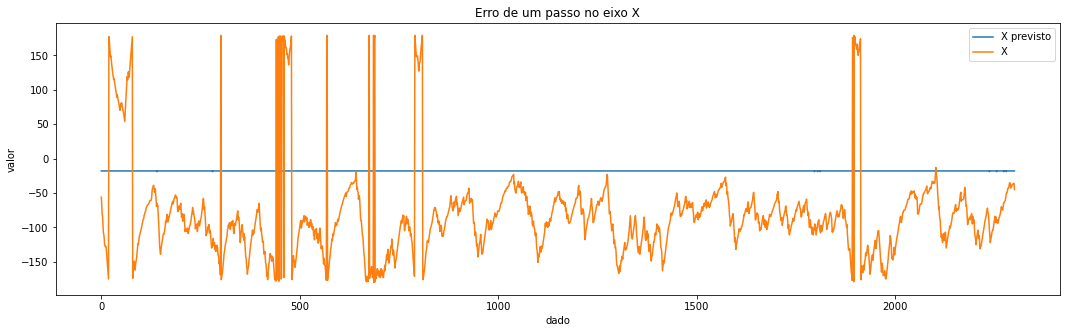

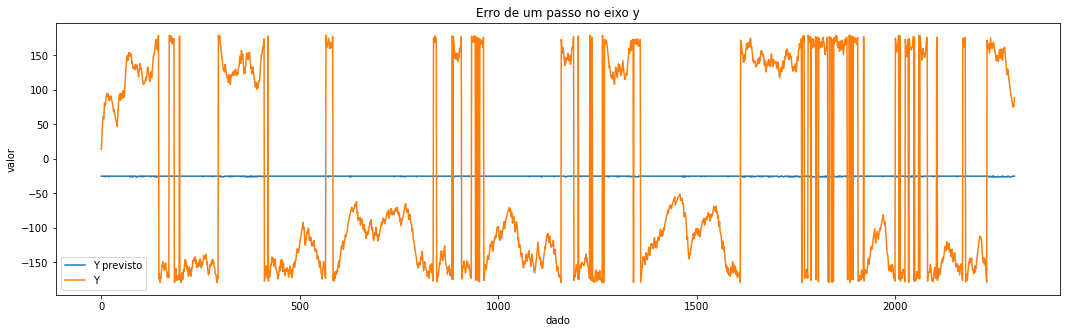

In [9]:

    


arq="15.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y,Z=[],[],[]
Xh,Yh,Zh=[],[],[]
for k in range(len(xTrainEscolhido)-1):
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)//1
    saidaEsperada=transformarSaida(y0)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
#     Z.append(saidaEsperada[2])
    
    Xh.append(saida[0])
    Yh.append(saida[1])
#     Zh.append(saida[2])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
print("Erro antes do treinamento")
plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo y")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()


__________________ TREINAMENTO 1____________________________________________________
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.8min ->Neuronios atualizados, erro atual: 0.09096035361289978 acuracia: 97.90741491350157
............
Epoca: 22 Time: 1.5min ->Neuronios atualizados, erro atual: 0.05713607370853424 acuracia: 98.50370475289914
..........A rede neural nao pode mais aprender com a taxa de aprendizado lr=1
Erro: 0.0793914720416069
Acuracia: 98.00609963461983


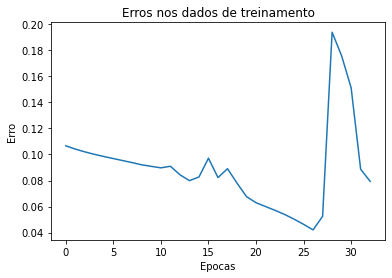

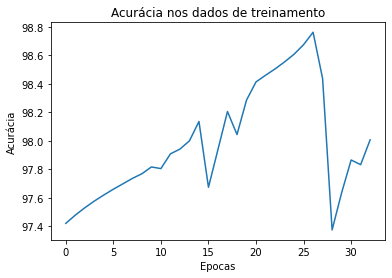

O modelo foi capaz de aprender até a epoca 22 para a taxa de aprendizado de 1
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.7min ->Neuronios atualizados, erro atual: 0.0336485356092453 acuracia: 99.0286384171773
............
Epoca: 22 Time: 1.5min ->Neuronios atualizados, erro atual: 0.03252021595835686 acuracia: 99.08284753868783
..........A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.9
Erro: 0.09247800707817078
Acuracia: 97.81046429260319


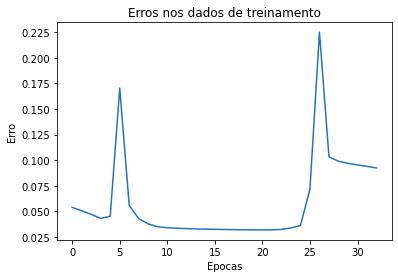

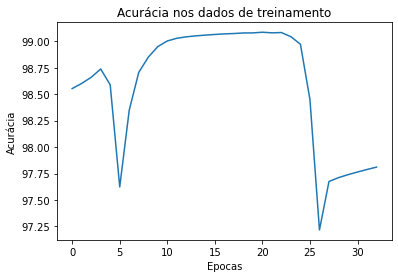

O modelo foi capaz de aprender até a epoca 22 para a taxa de aprendizado de 0.9
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.7min ->Neuronios atualizados, erro atual: 0.03171893581748009 acuracia: 99.08759889926189
............
Epoca: 22 Time: 1.5min ->Neuronios atualizados, erro atual: 0.0312759131193161 acuracia: 99.10455032732004
..........
Epoca: 33 Time: 2.3min ->Neuronios atualizados, erro atual: 0.031140413135290146 acuracia: 99.11203062779192
............
Epoca: 44 Time: 3.1min ->Neuronios atualizados, erro atual: 0.030600735917687416 acuracia: 99.126985895499
..........
Epoca: 55 Time: 3.8min ->Neuronios atualizados, erro atual: 0.030231503769755363 acuracia: 99.13758019780784
............
Epoca: 66 Time: 4.7min ->Neuronios atualizados, erro atual: 0.030127355828881264 acuracia: 99.14449417719968
..........
Epoca: 77 Time: 5.5min ->Neuronios atualizados, erro atual

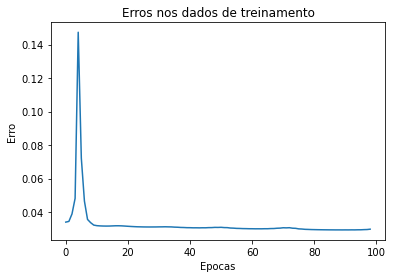

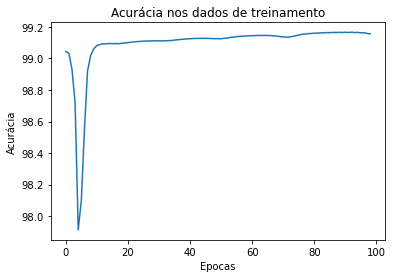

O modelo foi capaz de aprender até a epoca 88 para a taxa de aprendizado de 0.8
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.7min ->Neuronios atualizados, erro atual: 0.02886982448399067 acuracia: 99.17659669478456
............
Epoca: 22 Time: 1.5min ->Neuronios atualizados, erro atual: 0.02862526662647724 acuracia: 99.1827464892347
..........
Epoca: 33 Time: 2.3min ->Neuronios atualizados, erro atual: 0.0284808948636055 acuracia: 99.18598872758447
............
Epoca: 44 Time: 3.1min ->Neuronios atualizados, erro atual: 0.02839738130569458 acuracia: 99.18755205713954
..........A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.7000000000000001
Erro: 0.028512349352240562
Acuracia: 99.18252437961209


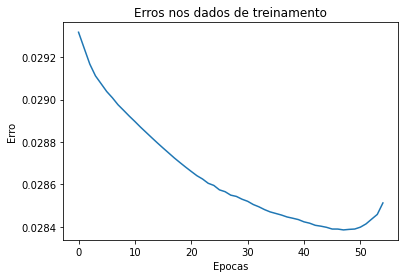

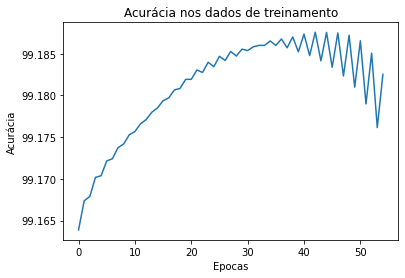

O modelo foi capaz de aprender até a epoca 44 para a taxa de aprendizado de 0.7000000000000001
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.8min ->Neuronios atualizados, erro atual: 0.027791433036327362 acuracia: 99.20216185322988
............
Epoca: 22 Time: 1.5min ->Neuronios atualizados, erro atual: 0.0275164395570755 acuracia: 99.20764976167568
..........
Epoca: 33 Time: 2.3min ->Neuronios atualizados, erro atual: 0.02721836231648922 acuracia: 99.2138302507695
............
Epoca: 44 Time: 3.1min ->Neuronios atualizados, erro atual: 0.027014540508389473 acuracia: 99.21063377125571
..........A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.6000000000000001
Erro: 0.02731388807296753
Acuracia: 99.18534759499664


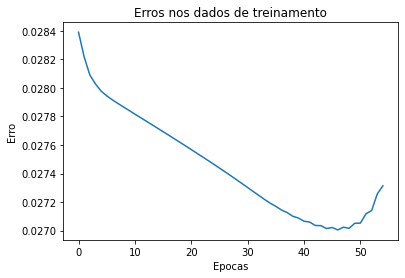

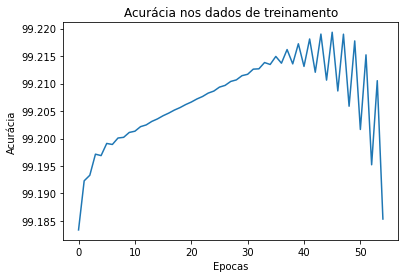

O modelo foi capaz de aprender até a epoca 44 para a taxa de aprendizado de 0.6000000000000001
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.8min ->Neuronios atualizados, erro atual: 0.026539945974946022 acuracia: 99.22658524394286
............
Epoca: 22 Time: 1.6min ->Neuronios atualizados, erro atual: 0.026194903999567032 acuracia: 99.2338691526789
..........
Epoca: 33 Time: 2.4min ->Neuronios atualizados, erro atual: 0.025812994688749313 acuracia: 99.23817725463314
..........A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.5000000000000001
Erro: 0.025898505002260208
Acuracia: 99.21253570784046


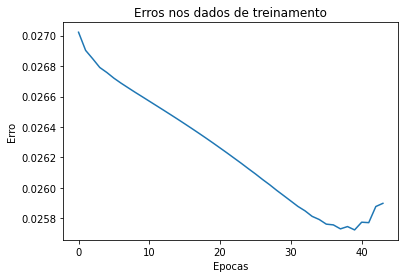

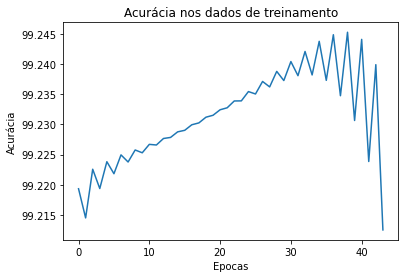

O modelo foi capaz de aprender até a epoca 33 para a taxa de aprendizado de 0.5000000000000001
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.8min ->Neuronios atualizados, erro atual: 0.02533370815217495 acuracia: 99.2504127878247
............
Epoca: 22 Time: 1.6min ->Neuronios atualizados, erro atual: 0.02484118938446045 acuracia: 99.26107547513048
..........
Epoca: 33 Time: 2.4min ->Neuronios atualizados, erro atual: 0.024297384545207024 acuracia: 99.26554828657304
............A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.40000000000000013
Erro: 0.024459082633256912
Acuracia: 99.25973350026923


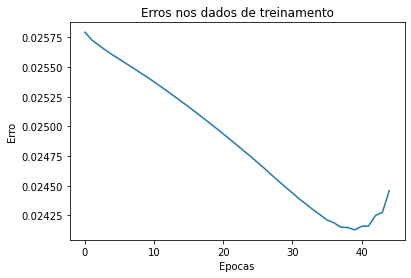

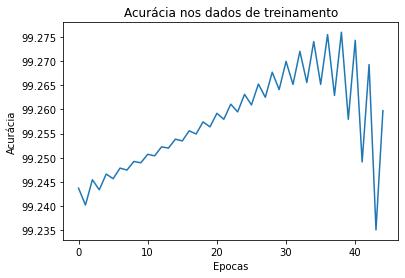

O modelo foi capaz de aprender até a epoca 33 para a taxa de aprendizado de 0.40000000000000013
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.9min ->Neuronios atualizados, erro atual: 0.02368084155023098 acuracia: 99.28268713694767
............
Epoca: 22 Time: 1.7min ->Neuronios atualizados, erro atual: 0.023106517270207405 acuracia: 99.29435692405315
..........
Epoca: 33 Time: 2.5min ->Neuronios atualizados, erro atual: 0.022463180124759674 acuracia: 99.30757491992712
............
Epoca: 44 Time: 3.3min ->Neuronios atualizados, erro atual: 0.021758148446679115 acuracia: 99.32418951013265
..........A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.30000000000000016
Erro: 0.021837472915649414
Acuracia: 99.30917193322666


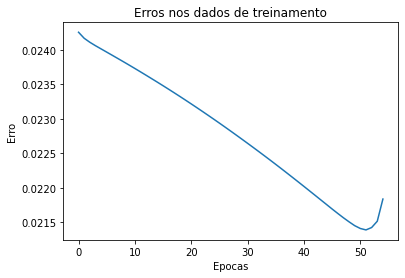

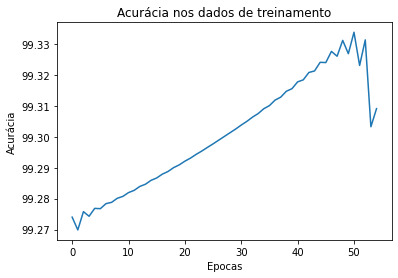

O modelo foi capaz de aprender até a epoca 44 para a taxa de aprendizado de 0.30000000000000016
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.8min ->Neuronios atualizados, erro atual: 0.02119751274585724 acuracia: 99.33751509550464
............
Epoca: 22 Time: 1.5min ->Neuronios atualizados, erro atual: 0.02071506902575493 acuracia: 99.35032992711957
..........
Epoca: 33 Time: 2.3min ->Neuronios atualizados, erro atual: 0.020253153517842293 acuracia: 99.36337816764245
............
Epoca: 44 Time: 3.1min ->Neuronios atualizados, erro atual: 0.01982251927256584 acuracia: 99.37648009884057
..........
Epoca: 55 Time: 3.9min ->Neuronios atualizados, erro atual: 0.01943833753466606 acuracia: 99.38899544724472
............
Epoca: 66 Time: 4.7min ->Neuronios atualizados, erro atual: 0.019114572554826736 acuracia: 99.39822318978423
..........A rede neural nao pode mais aprender com a

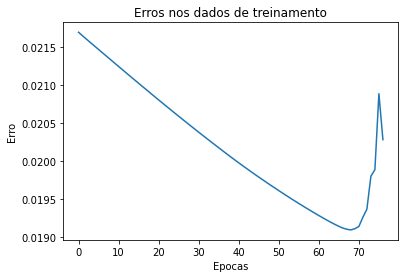

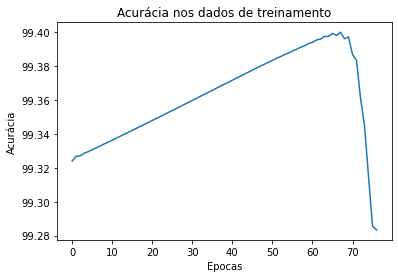

O modelo foi capaz de aprender até a epoca 66 para a taxa de aprendizado de 0.20000000000000015
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.8min ->Neuronios atualizados, erro atual: 0.018922356888651848 acuracia: 99.40686057027555
............
Epoca: 22 Time: 1.6min ->Neuronios atualizados, erro atual: 0.01878184638917446 acuracia: 99.41203692129821
..........
Epoca: 33 Time: 2.4min ->Neuronios atualizados, erro atual: 0.018650436773896217 acuracia: 99.4169786341072
............
Epoca: 44 Time: 3.3min ->Neuronios atualizados, erro atual: 0.018527094274759293 acuracia: 99.42169170510542
..........
Epoca: 55 Time: 4.1min ->Neuronios atualizados, erro atual: 0.01841072365641594 acuracia: 99.42622097276718
............
Epoca: 66 Time: 4.8min ->Neuronios atualizados, erro atual: 0.018301889300346375 acuracia: 99.4306018705749
..........
Epoca: 77 Time: 5.6min ->Neuronios atuali

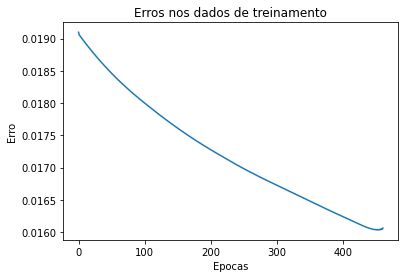

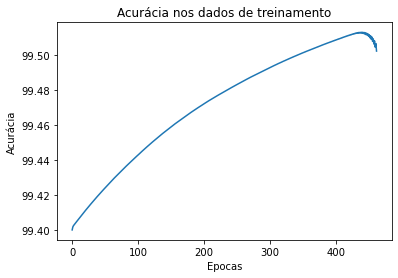

O modelo foi capaz de aprender até a epoca 451 para a taxa de aprendizado de 0.10000000000000014
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
..........
Epoca: 11 Time: 0.8min ->Neuronios atualizados, erro atual: 0.016035832464694977 acuracia: 99.51116413173563
.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 

In [10]:
print("__________________ TREINAMENTO 1____________________________________________________")

tic=time.time()
Epocas=1000
Aprendizado=1
while(Aprendizado>0):
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    qEpocas,roboQuadrupede=treinamento(Epocas,roboQuadrupede,Aprendizado,"15.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")
    print("O modelo foi capaz de aprender até a epoca "+str(qEpocas)+" para a taxa de aprendizado de "+ str(Aprendizado))
    Aprendizado=Aprendizado-0.1

print("O treinamento levou "+str(((time.time()-tic)//6)/10)+" segundos")

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306


<ipython-input-11-9a592279fb7b>:12: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saida=transformarSaida(yh0)//1
<ipython-input-11-9a592279fb7b>:13: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saidaEsperada=transformarSaida(y0)//1


Testando X


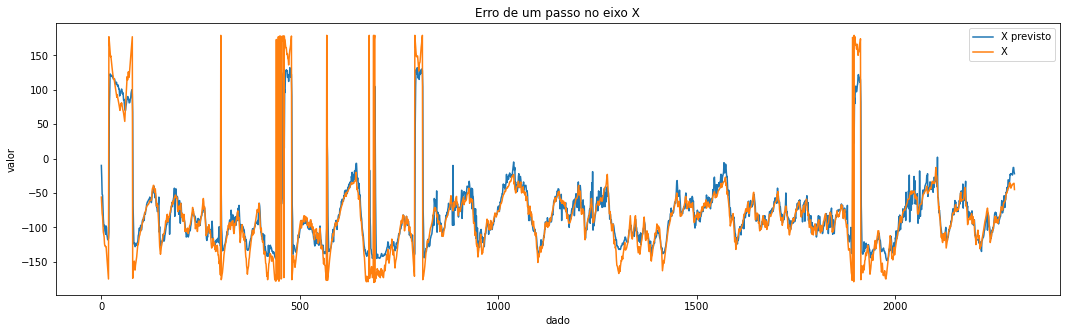

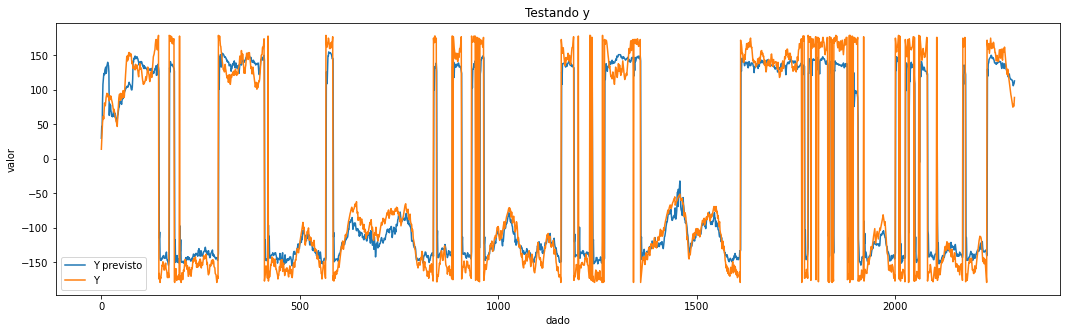

In [11]:
arq="15.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]
for k in range(len(xTrainEscolhido)-1):
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)//1
    saidaEsperada=transformarSaida(y0)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
#     Z.append(saidaEsperada[2])
    
    Xh.append(saida[0])
    Yh.append(saida[1])
#     Zh.append(saida[2])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
print("Testando X")
plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Testando y")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

__________________ TREINAMENTO 2____________________________________________________
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.03
Erro: 0.03235416114330292
Acuracia: 98.93768400711434


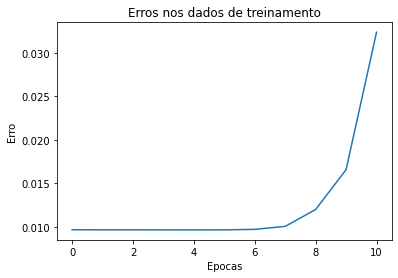

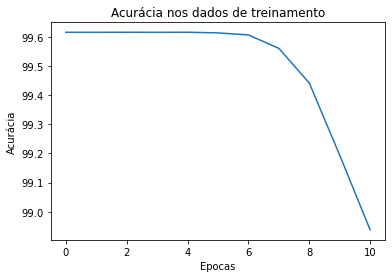

O modelo foi capaz de aprender até a epoca 0 para a taxa de aprendizado de 0.03
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................
Epoca: 10 Time: 0.7min ->Neuronios atualizados, erro atual: 0.009658832103013992 acuracia: 99.61617835738204
....................A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.019999999999999997
Erro: 0.010076960548758507
Acuracia: 99.56631233627722


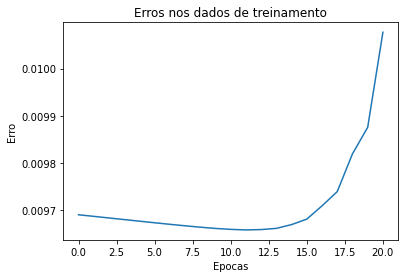

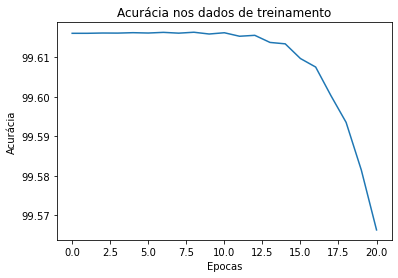

O modelo foi capaz de aprender até a epoca 10 para a taxa de aprendizado de 0.019999999999999997
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................
Epoca: 10 Time: 0.7min ->Neuronios atualizados, erro atual: 0.009634451009333134 acuracia: 99.61656226731125
....................
Epoca: 20 Time: 1.4min ->Neuronios atualizados, erro atual: 0.009616712108254433 acuracia: 99.61673807621862
....................
Epoca: 30 Time: 2.2min ->Neuronios atualizados, erro atual: 0.009598868899047375 acuracia: 99.61691152479672
....................
Epoca: 40 Time: 2.9min ->Neuronios atualizados, erro atual: 0.009581184014678001 acuracia: 99.61708597888462
....................
Epoca: 50 Time: 3.6min ->Neuronios atualizados, erro atual: 0.009563608095049858 acuracia: 99.61727516317642
....................
Epoca: 60 Time: 4.3min ->Neuronios atualizados, erro atual: 0.009546150453388691 acuracia: 99.61745975

....................
Epoca: 620 Time: 45.1min ->Neuronios atualizados, erro atual: 0.008600817061960697 acuracia: 99.6292042027346
....................
Epoca: 630 Time: 45.8min ->Neuronios atualizados, erro atual: 0.008584581315517426 acuracia: 99.62944470976444
....................
Epoca: 640 Time: 46.5min ->Neuronios atualizados, erro atual: 0.008568376302719116 acuracia: 99.6296797002188
....................
Epoca: 650 Time: 47.3min ->Neuronios atualizados, erro atual: 0.008552263490855694 acuracia: 99.62992273809387
....................
Epoca: 660 Time: 48.0min ->Neuronios atualizados, erro atual: 0.008536224253475666 acuracia: 99.630168809555
....................
Epoca: 670 Time: 48.7min ->Neuronios atualizados, erro atual: 0.008520110510289669 acuracia: 99.63042175523307
....................
Epoca: 680 Time: 49.4min ->Neuronios atualizados, erro atual: 0.00850403681397438 acuracia: 99.63066463407175
....................
Epoca: 690 Time: 50.2min ->Neuronios atualizados, erro atual

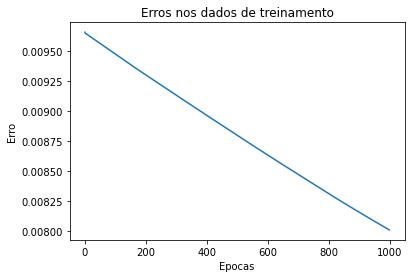

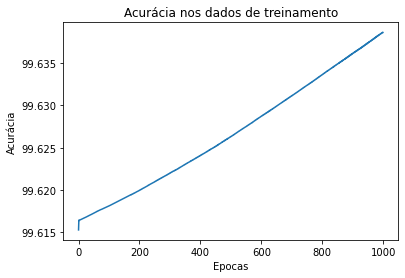

O treinamento levou 72.5 segundos
O modelo foi capaz de aprender até a epoca 1000 para a taxa de aprendizado de 0.009999999999999997
O treinamento levou 75.9 segundos


In [9]:
print("__________________ TREINAMENTO 2____________________________________________________")

tic=time.time()
Epocas=1000
Aprendizado=0.1
while(Aprendizado>0):
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    qEpocas,roboQuadrupede=treinamento(Epocas,roboQuadrupede,Aprendizado,"15.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")
    print("O modelo foi capaz de aprender até a epoca "+str(qEpocas)+" para a taxa de aprendizado de "+ str(Aprendizado))
    Aprendizado=Aprendizado-0.01

print("O treinamento levou "+str(((time.time()-tic)//6)/10)+" segundos")

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306


<ipython-input-10-9a592279fb7b>:12: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saida=transformarSaida(yh0)//1
<ipython-input-10-9a592279fb7b>:13: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saidaEsperada=transformarSaida(y0)//1


Testando X


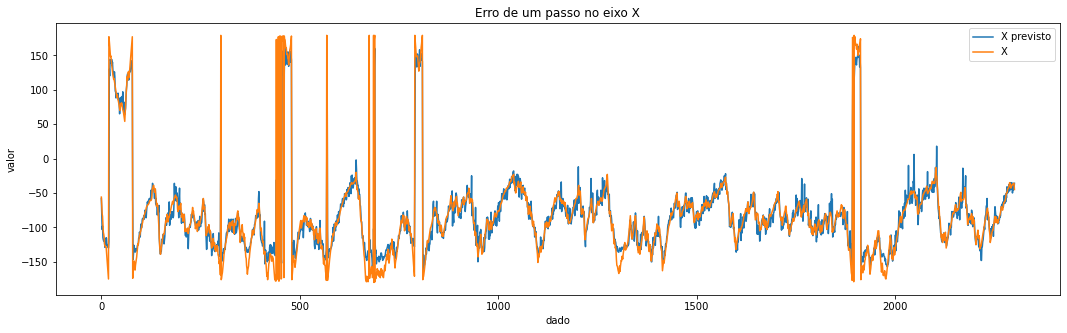

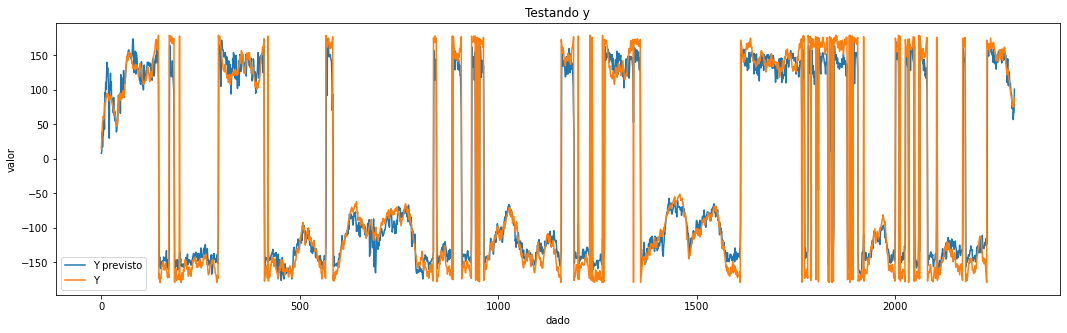

In [10]:
arq="15.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]
for k in range(len(xTrainEscolhido)-1):
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)//1
    saidaEsperada=transformarSaida(y0)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
#     Z.append(saidaEsperada[2])
    
    Xh.append(saida[0])
    Yh.append(saida[1])
#     Zh.append(saida[2])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
print("Testando X")
plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Testando y")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

__________________ TREINAMENTO 3____________________________________________________
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.01
Erro: 0.004075445234775543
Acuracia: 99.70696420432628


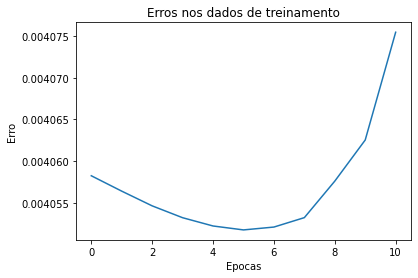

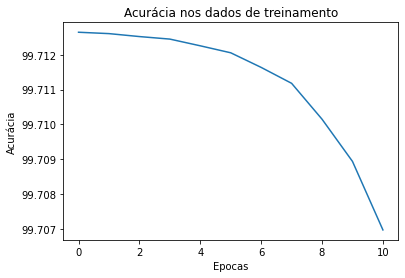

O modelo foi capaz de aprender até a epoca 0 para a taxa de aprendizado de 0.01
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................
Epoca: 10 Time: 1.0min ->Neuronios atualizados, erro atual: 0.004038952756673098 acuracia: 99.71233504931082
....................
Epoca: 20 Time: 2.0min ->Neuronios atualizados, erro atual: 0.004033064469695091 acuracia: 99.7095426477778
....................A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.0095
Erro: 0.004148836247622967
Acuracia: 99.68993147598229


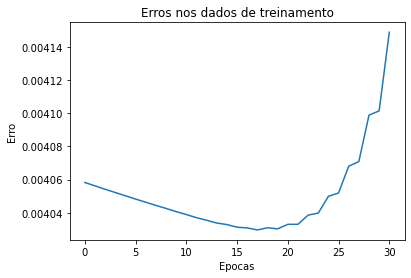

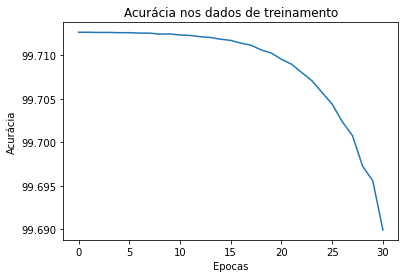

O modelo foi capaz de aprender até a epoca 20 para a taxa de aprendizado de 0.0095
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................
Epoca: 10 Time: 1.0min ->Neuronios atualizados, erro atual: 0.004005046095699072 acuracia: 99.70945105280653
....................
Epoca: 20 Time: 2.1min ->Neuronios atualizados, erro atual: 0.003978691529482603 acuracia: 99.70959925576133
....................
Epoca: 30 Time: 3.1min ->Neuronios atualizados, erro atual: 0.0039521316066384315 acuracia: 99.70988571171584
....................
Epoca: 40 Time: 4.1min ->Neuronios atualizados, erro atual: 0.00393547210842371 acuracia: 99.70862303686543
....................
Epoca: 50 Time: 5.1min ->Neuronios atualizados, erro atual: 0.0039193411357700825 acuracia: 99.70726597648527
....................
Epoca: 60 Time: 6.1min ->Neuronios atualizados, erro atual: 0.003913779743015766 acuracia: 99.70445131899763
......

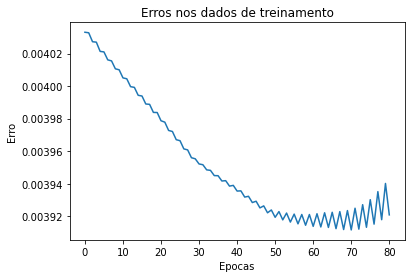

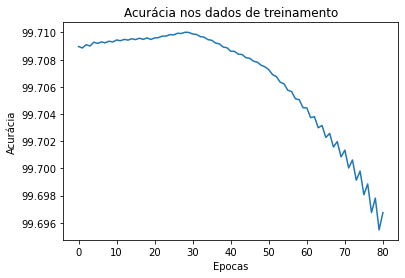

O modelo foi capaz de aprender até a epoca 70 para a taxa de aprendizado de 0.009
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................
Epoca: 10 Time: 1.1min ->Neuronios atualizados, erro atual: 0.003820982063189149 acuracia: 99.71143148819377
....................
Epoca: 20 Time: 2.1min ->Neuronios atualizados, erro atual: 0.0037869226653128862 acuracia: 99.71302428576195
....................
Epoca: 30 Time: 3.1min ->Neuronios atualizados, erro atual: 0.003762495703995228 acuracia: 99.71344734624323
....................
Epoca: 40 Time: 4.1min ->Neuronios atualizados, erro atual: 0.003739886684343219 acuracia: 99.71362541192741
....................
Epoca: 50 Time: 5.1min ->Neuronios atualizados, erro atual: 0.003716378938406706 acuracia: 99.71371954805157
....................
Epoca: 60 Time: 6.1min ->Neuronios atualizados, erro atual: 0.003691028570756316 acuracia: 99.713799426012
.........

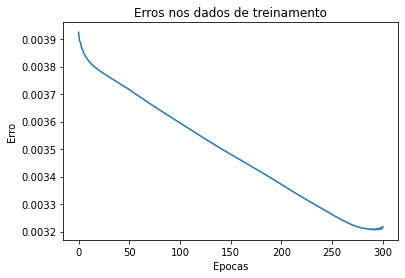

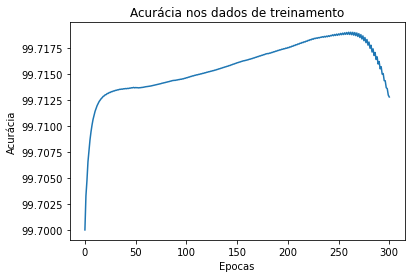

O modelo foi capaz de aprender até a epoca 290 para a taxa de aprendizado de 0.008499999999999999
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................
Epoca: 10 Time: 1.0min ->Neuronios atualizados, erro atual: 0.003154114121571183 acuracia: 99.72054839674911
....................
Epoca: 20 Time: 1.8min ->Neuronios atualizados, erro atual: 0.003128697397187352 acuracia: 99.72172967500781
....................
Epoca: 30 Time: 2.7min ->Neuronios atualizados, erro atual: 0.0031077065505087376 acuracia: 99.7223064799143
....................
Epoca: 40 Time: 3.6min ->Neuronios atualizados, erro atual: 0.003087930381298065 acuracia: 99.7227648501585
....................
Epoca: 50 Time: 4.5min ->Neuronios atualizados, erro atual: 0.0030682249926030636 acuracia: 99.72320561987243
....................
Epoca: 60 Time: 5.5min ->Neuronios atualizados, erro atual: 0.0030488192569464445 acuracia: 99.723646

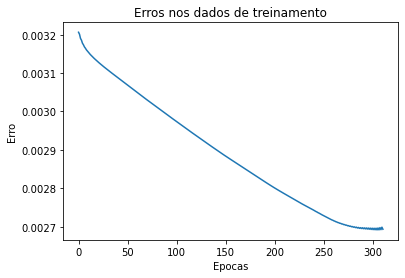

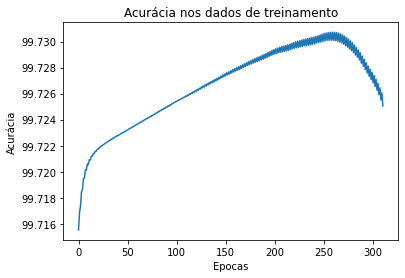

O modelo foi capaz de aprender até a epoca 300 para a taxa de aprendizado de 0.007999999999999998
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................
Epoca: 10 Time: 1.1min ->Neuronios atualizados, erro atual: 0.0026338021270930767 acuracia: 99.73374408114148
....................
Epoca: 20 Time: 2.1min ->Neuronios atualizados, erro atual: 0.002616230398416519 acuracia: 99.73458448282273
....................
Epoca: 30 Time: 3.1min ->Neuronios atualizados, erro atual: 0.002602705266326666 acuracia: 99.73497883670585
....................
Epoca: 40 Time: 4.1min ->Neuronios atualizados, erro atual: 0.0025898523163050413 acuracia: 99.73536175304437
....................
Epoca: 50 Time: 5.1min ->Neuronios atualizados, erro atual: 0.002577385166659951 acuracia: 99.73575428038257
....................
Epoca: 60 Time: 6.2min ->Neuronios atualizados, erro atual: 0.0025650146417319775 acuracia: 99.7361

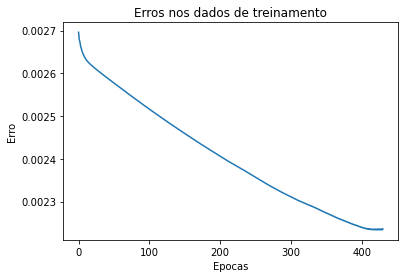

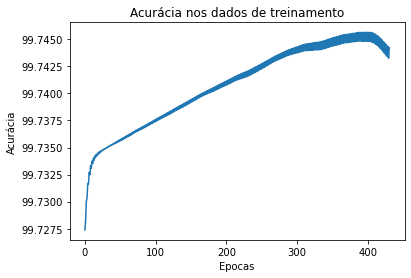

O modelo foi capaz de aprender até a epoca 420 para a taxa de aprendizado de 0.007499999999999998
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................
Epoca: 10 Time: 0.9min ->Neuronios atualizados, erro atual: 0.002196753630414605 acuracia: 99.74847651460831
....................
Epoca: 20 Time: 1.7min ->Neuronios atualizados, erro atual: 0.0021869309712201357 acuracia: 99.74926355768623
....................
Epoca: 30 Time: 2.5min ->Neuronios atualizados, erro atual: 0.0021792601328343153 acuracia: 99.74965740232656
....................
Epoca: 40 Time: 3.4min ->Neuronios atualizados, erro atual: 0.002172081731259823 acuracia: 99.74991983059734
....................
Epoca: 50 Time: 4.2min ->Neuronios atualizados, erro atual: 0.0021650237031280994 acuracia: 99.75017859333337
....................
Epoca: 60 Time: 5.1min ->Neuronios atualizados, erro atual: 0.0021579789463430643 acuracia: 99.750

....................
Epoca: 620 Time: 59.2min ->Neuronios atualizados, erro atual: 0.0018513845279812813 acuracia: 99.76387163377134
....................
Epoca: 630 Time: 60.0min ->Neuronios atualizados, erro atual: 0.0018467948539182544 acuracia: 99.76410911633513
....................
Epoca: 640 Time: 60.9min ->Neuronios atualizados, erro atual: 0.0018417559331282973 acuracia: 99.76441013779299
....................
Epoca: 650 Time: 61.7min ->Neuronios atualizados, erro atual: 0.0018377482192590833 acuracia: 99.7645713557746
....................
Epoca: 660 Time: 62.5min ->Neuronios atualizados, erro atual: 0.0018331804312765598 acuracia: 99.76480764469596
....................
Epoca: 670 Time: 63.4min ->Neuronios atualizados, erro atual: 0.0018288657302036881 acuracia: 99.76501312176843
....................
Epoca: 680 Time: 64.2min ->Neuronios atualizados, erro atual: 0.0018248329870402813 acuracia: 99.76517640944036
....................
Epoca: 690 Time: 65.1min ->Neuronios atualizados,

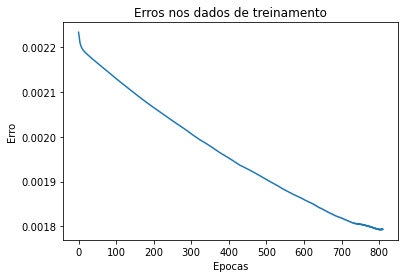

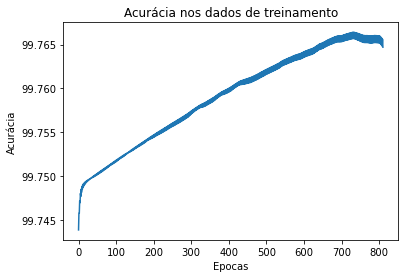

O modelo foi capaz de aprender até a epoca 800 para a taxa de aprendizado de 0.0069999999999999975
Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
....................
Epoca: 10 Time: 0.8min ->Neuronios atualizados, erro atual: 0.0017589282942935824 acuracia: 99.76998545812309
....................
Epoca: 20 Time: 1.7min ->Neuronios atualizados, erro atual: 0.0017534592188894749 acuracia: 99.77027472463696
....................
Epoca: 30 Time: 2.5min ->Neuronios atualizados, erro atual: 0.0017494474304839969 acuracia: 99.770476813575
....................
Epoca: 40 Time: 3.4min ->Neuronios atualizados, erro atual: 0.001745578832924366 acuracia: 99.77068747785611
....................
Epoca: 50 Time: 4.2min ->Neuronios atualizados, erro atual: 0.0017419012729078531 acuracia: 99.77089591938237
....................
Epoca: 60 Time: 5.0min ->Neuronios atualizados, erro atual: 0.0017383033409714699 acuracia: 99.771

....................
Epoca: 620 Time: 55.9min ->Neuronios atualizados, erro atual: 0.0015532448887825012 acuracia: 99.78198654866043
....................
Epoca: 630 Time: 57.0min ->Neuronios atualizados, erro atual: 0.0015507403295487165 acuracia: 99.78212916870132
....................
Epoca: 640 Time: 58.0min ->Neuronios atualizados, erro atual: 0.0015483580064028502 acuracia: 99.78226183792557
....................
Epoca: 650 Time: 59.1min ->Neuronios atualizados, erro atual: 0.0015461912844330072 acuracia: 99.78236459135148
....................
Epoca: 660 Time: 60.1min ->Neuronios atualizados, erro atual: 0.0015437401598319411 acuracia: 99.78249931110739
....................
Epoca: 670 Time: 61.1min ->Neuronios atualizados, erro atual: 0.0015401645796373487 acuracia: 99.78274989484125
....................
Epoca: 680 Time: 62.2min ->Neuronios atualizados, erro atual: 0.001536722993478179 acuracia: 99.78299255372927
....................
Epoca: 690 Time: 63.2min ->Neuronios atualizados,

KeyboardInterrupt: 

In [16]:
print("__________________ TREINAMENTO 3____________________________________________________")

tic=time.time()
Epocas=1000
Aprendizado=0.01
while(Aprendizado>0):
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    qEpocas,roboQuadrupede=treinamento(Epocas,roboQuadrupede,Aprendizado,"15.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")
    print("O modelo foi capaz de aprender até a epoca "+str(qEpocas)+" para a taxa de aprendizado de "+ str(Aprendizado))
    Aprendizado=Aprendizado-0.0005

print("O treinamento levou "+str(((time.time()-tic)//6)/10)+" segundos")

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306


<ipython-input-17-9a592279fb7b>:12: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saida=transformarSaida(yh0)//1
<ipython-input-17-9a592279fb7b>:13: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saidaEsperada=transformarSaida(y0)//1


Testando X


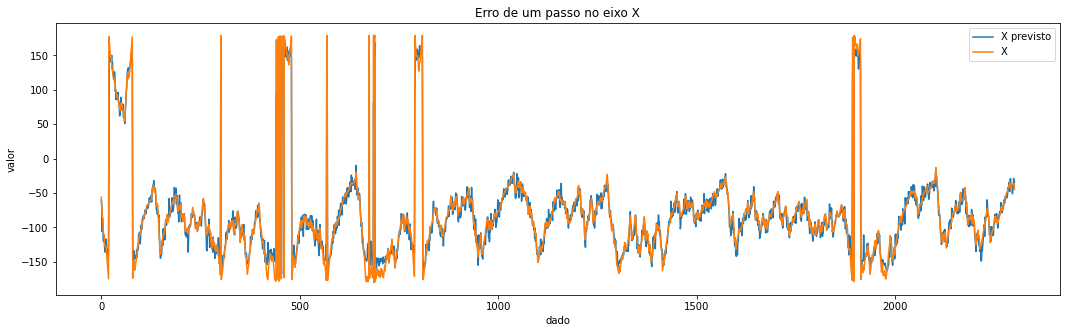

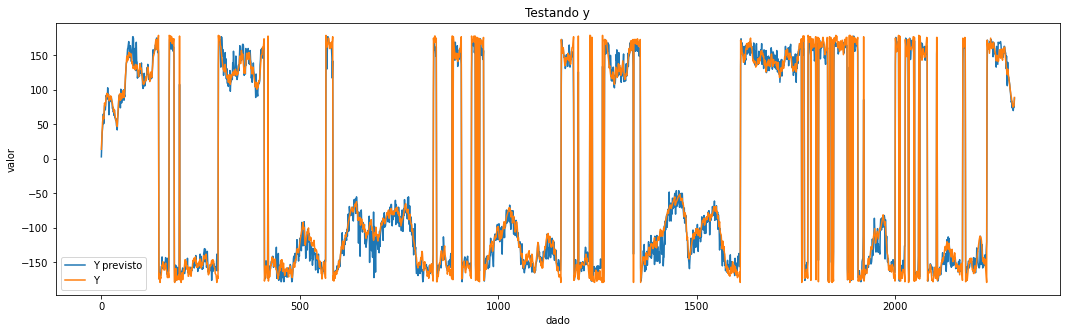

In [17]:
arq="15.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]
for k in range(len(xTrainEscolhido)-1):
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)//1
    saidaEsperada=transformarSaida(y0)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
#     Z.append(saidaEsperada[2])
    
    Xh.append(saida[0])
    Yh.append(saida[1])
#     Zh.append(saida[2])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
print("Testando X")
plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Testando y")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

In [18]:
#define Criar código que testa 2 pontos a frente

In [ ]:
#criar código que testa 3 pontos a frente

In [19]:


def extrairComandos(indice,dados):
    vetor=dados[indice]
    DADOS_I_0=vetor[70:105]

    return DADOS_I_0[0:12],DADOS_I_0[12:24],DADOS_I_0[12:15],DADOS_I_0[15:18],DADOS_I_0[18],DADOS_I_0[19],DADOS_I_0[34]
    
def construirProximaEntrada(EM,CM,Gy,Ac,Temp,HSR,X,Y,Z):
    entrada=[]
    
    for k in EM:
        entrada.append(k)
    for k in CM:
        entrada.append(k)
    for k in Gy:
        entrada.append(k)
    for k in Ac:
        entrada.append(k)
    
    entrada.append(Temp)
    entrada.append(HSR)
    entrada.append(X)
    entrada.append(Y)
    entrada.append(Z)
    
    return entrada

def calcularErroPropagado(vetorPrevisto, vetorEsperado):
    variacao=np.array(vetorPrevisto)-np.array(vetorEsperado)
    
    erro=[]
    erroAcumulado=0
    
    for v in variacao:
        erroAcumulado=erroAcumulado+np.abs(v.item())
        erro.append(erroAcumulado)
       
    
    return np.array(erro)
   
    
def teste(modelo,arquivo,Q):
    import random
    xTeste,yTeste=gerarDadosTrain(arquivo)
    tamanhoVetorTeste=len(xTeste)
    indice = random.randint(0,tamanhoVetorTeste-1)
    print("Amostra sorteada: "+str(indice))
    if((tamanhoVetorTeste-indice-1)<Q):
        Q=tamanhoVetorTeste-indice-1

    posicaoInicialRobo=xTeste[indice]
    print("___________________________________________Condições Inicial__________________________________________________________")
    
    DADOS_I_2=np.array(posicaoInicialRobo[0:35])
    DADOS_I_1=np.array(posicaoInicialRobo[35:70])
    DADOS_I_0=np.array(posicaoInicialRobo[70:105])

    
    print("Posicao dos motores: ")
    print(DADOS_I_0[0:12])
    print("Comando dado aos motores: ")
    print(DADOS_I_0[12:24])
    print("Giroscópio(GyX, GyY, GyZ): ")
    print(DADOS_I_0[24:27])
    print("Acelerometro(AcX, AcY, AcZ): ")
    print(DADOS_I_0[27:30])

    print("Temperatura[i-2]: ")
    print(DADOS_I_0[30])

    print("Ultrassonico[i-2]: ")
    print(DADOS_I_0[31])

    print("Inclinação(x,y,z)[i-2]: ")
    print(DADOS_I_0[32:35])
    
 
    Xh,Yh=[],[]
    X, Y=[],[]
    
    Xh.append(DADOS_I_0[32])
    Yh.append(DADOS_I_0[33])
#     Zh.append(DADOS_I_0[34])

    X.append(DADOS_I_0[32])
    Y.append(DADOS_I_0[33])
#     Z.append(DADOS_I_0[34])
    
    while(indice<(tamanhoVetorTeste-1)):

        entrada=[]
        
        for k in DADOS_I_2:
            entrada.append(k)
        for k in DADOS_I_1:
            entrada.append(k)
        for k in DADOS_I_0:
            entrada.append(k)
        
        
        E=torch.from_numpy(np.array(entrada,dtype=np.float)).float()#testeval
        S=modelo.forward(E)
        
        
        vetorPrevisto=transformarSaida(S)
        saidaEsperada=transformarSaida(yTeste[indice])
        
#         EM=vetorPrevisto[0:12]
#         Gy=vetorPrevisto[12:15]
#         Ac=vetorPrevisto[15:18]
#         Temp=vetorPrevisto[18]
#         HSR=vetorPrevisto[19]
#         XP=vetorPrevisto[20]
#         YP=vetorPrevisto[21]
#         ZP=vetorPrevisto[22]


        XP=vetorPrevisto[0]
        YP=vetorPrevisto[1]
#         ZP=vetorPrevisto[2]
        
        EM,CM,Gy,Ac,Temp,HSR,Z=extrairComandos((indice+1),xTeste)
        
        DADOS_I_2=DADOS_I_1
        DADOS_I_1=DADOS_I_0
        DADOS_I_0=construirProximaEntrada(EM,CM,Gy,Ac,Temp,HSR,XP,YP,Z)
        
        
        XR=saidaEsperada[0]
        YR=saidaEsperada[1]
#         ZR=saidaEsperada[2]
#         print(XR.item(),XP.item())
        
        Xh.append(XP)
        Yh.append(YP)
#         Zh.append(ZP)
        
        X.append(XR)
        Y.append(YR)
#         Z.append(ZR)
        
        indice=indice+1
    
    
    
#     plt.figure(figsize=[18,5])   
#     plt.title("X,y,z") 
#     plt.plot(Xh,label="X previsto",c='r')
#     plt.plot(X,label="X Real",c='r')
#     plt.plot(Yh,label="Y previsto",c='g')
#     plt.plot(Y,label="Y Real",c='g')
#     plt.plot(Zh,label="Z previsto",c='b')
#     plt.plot(Z,label="Z Real",c='b')
#     plt.xlim([0,Q])
#     plt.legend()
#     plt.show()


    plt.figure(figsize=[18,5])   
    plt.title("X,Y")
    plt.plot(Xh,label="X previsto")
    plt.plot(X,label="X Real")
    plt.xlim([0, Q])
    plt.legend()
    plt.show()
    
    plt.figure(figsize=[18,5])   
    plt.title("Y")
    plt.plot(Yh,label="Y previsto")
    plt.plot(Y,label="Y Real")
    plt.xlim([0, Q])
    plt.legend()
    plt.show() 
    
#     plt.figure(figsize=[18,5])   
#     plt.title("Z")
#     plt.plot(Zh,label="Z previsto")
#     plt.plot(Z,label="Z Real")
#     plt.xlim([0, Q])
#     plt.legend()
#     plt.show()
    
    erroX=calcularErroPropagado(X,Xh)
    erroY=calcularErroPropagado(Y,Yh)
#     erroZ=calcularErroPropagado(Z,Zh)
    
    erro=(erroX+erroY)/2
    

    
    
    return erro


Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
Amostra sorteada: 1486
___________________________________________Condições Inicial__________________________________________________________
Posicao dos motores: 
[ 71.  74.  93. 116. 104.  85.  82. 111.  60.  96.  82.  96.]
Comando dado aos motores: 
[ 71.  74.  93. 116. 104.  85.  69. 111.  68.  96.  82.  96.]
Giroscópio(GyX, GyY, GyZ): 
[114.07 -84.25 -11.27]
Acelerometro(AcX, AcY, AcZ): 
[-0.19  1.69  2.47]
Temperatura[i-2]: 
28.15
Ultrassonico[i-2]: 
71.61
Inclinação(x,y,z)[i-2]: 
[ -71.77 -137.15   23.74]


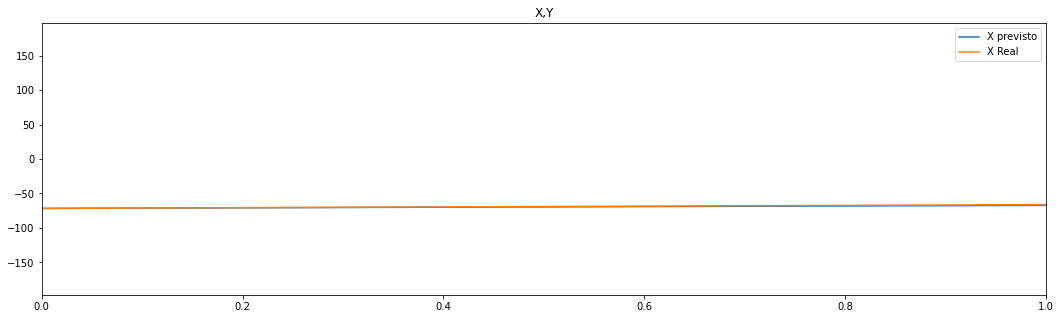

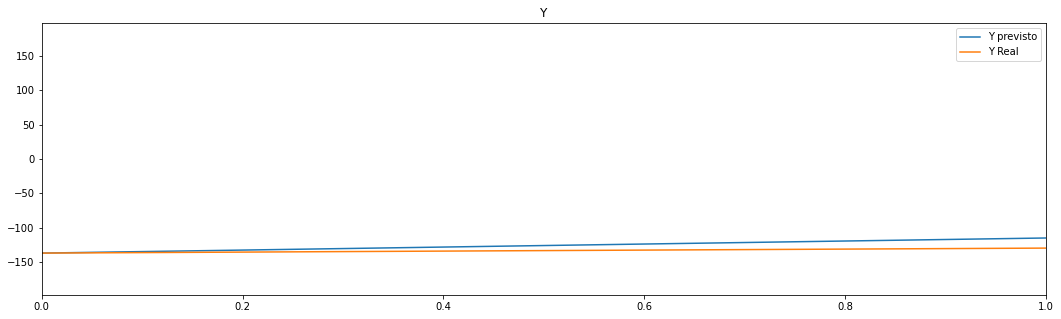

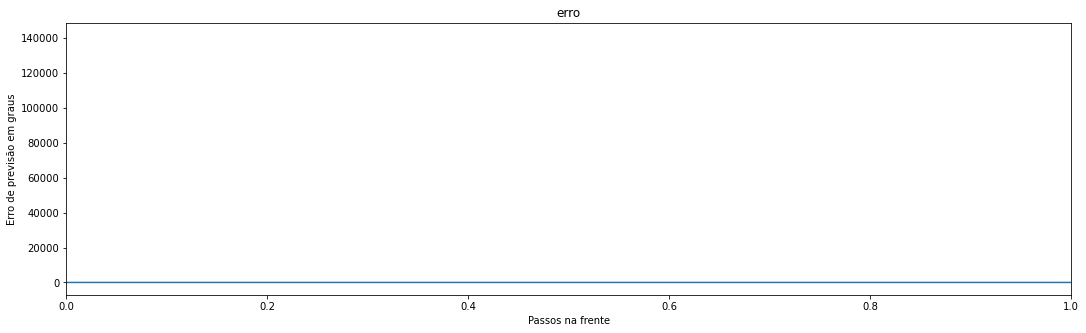

Foi possivel prever até o passo numero 1


In [20]:
erroAceitavel=5

passos = 1# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"15.txt",passos)

plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()

cont=0

for k in erro:
    if(k<erroAceitavel):
        cont=cont+1
print("Foi possivel prever até o passo numero "+str(cont))

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
Amostra sorteada: 261
___________________________________________Condições Inicial__________________________________________________________
Posicao dos motores: 
[112.  80. 106.  85.  83. 101.  63.  61.  79.  87. 111. 116.]
Comando dado aos motores: 
[112.  80. 106.  85.  83. 101.  63.  61.  79.  87. 111. 116.]
Giroscópio(GyX, GyY, GyZ): 
[-1.63 -7.58 -2.47]
Acelerometro(AcX, AcY, AcZ): 
[-0.9   0.54 -2.14]
Temperatura[i-2]: 
28.2
Ultrassonico[i-2]: 
46.7
Inclinação(x,y,z)[i-2]: 
[ -63.19 -140.15  -16.12]


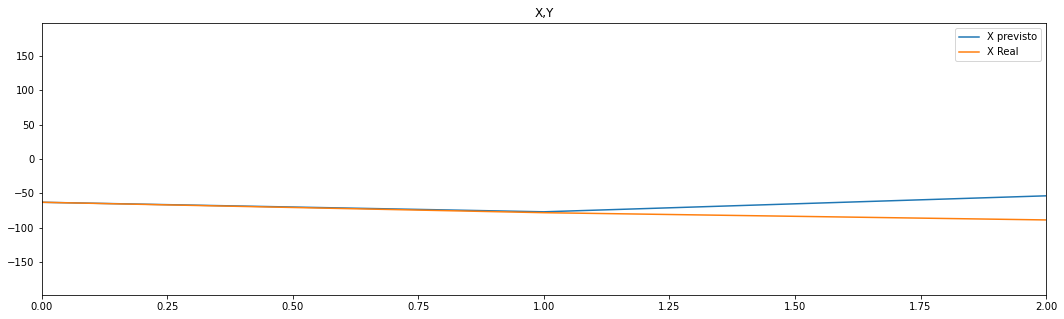

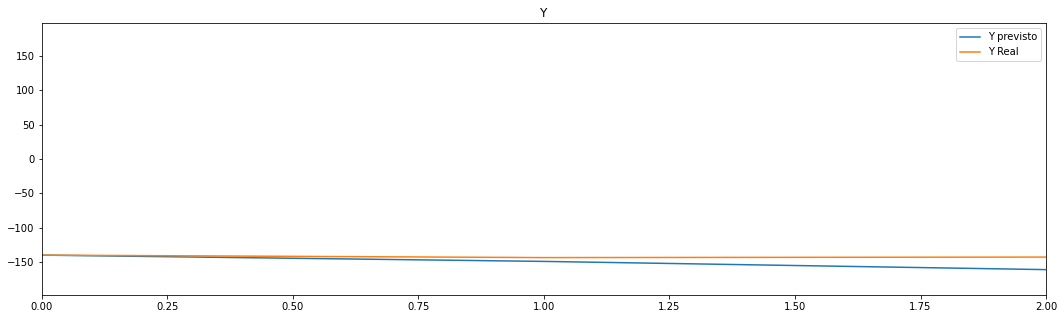

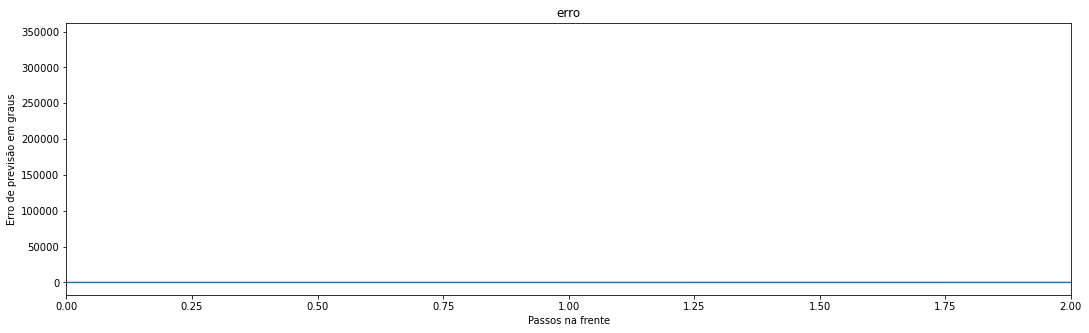

Foi possivel prever até o passo numero 2


In [21]:
erroAceitavel=5

passos = 2# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"15.txt",passos)

plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()

cont=0

for k in erro:
    if(k<erroAceitavel):
        cont=cont+1
print("Foi possivel prever até o passo numero "+str(cont))

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
Amostra sorteada: 416
___________________________________________Condições Inicial__________________________________________________________
Posicao dos motores: 
[ 75.  64. 102. 103.  71.  99.  80.  60.  90.  68.  80.  65.]
Comando dado aos motores: 
[ 75.  64. 102. 103.  71.  99.  80.  60.  90.  68.  80.  65.]
Giroscópio(GyX, GyY, GyZ): 
[  4.   -22.07  23.41]
Acelerometro(AcX, AcY, AcZ): 
[-2.56 -0.64 -1.69]
Temperatura[i-2]: 
28.29
Ultrassonico[i-2]: 
58.83
Inclinação(x,y,z)[i-2]: 
[-144.35 -165.6   -26.31]


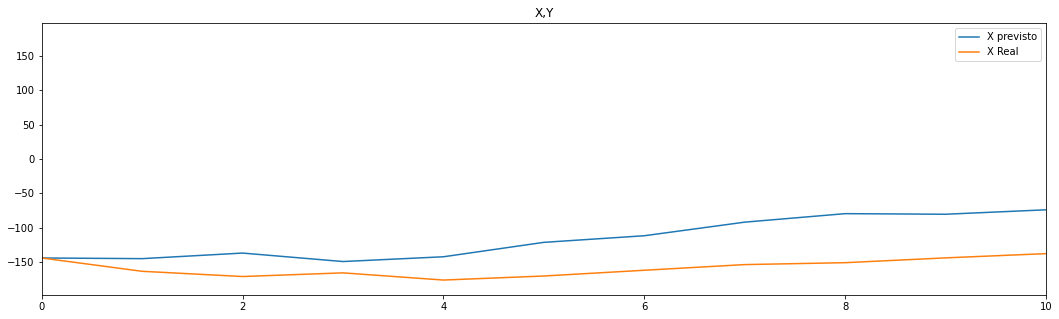

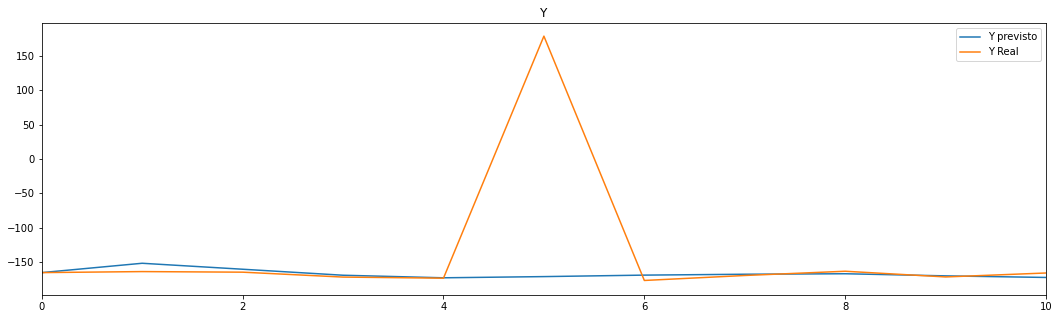

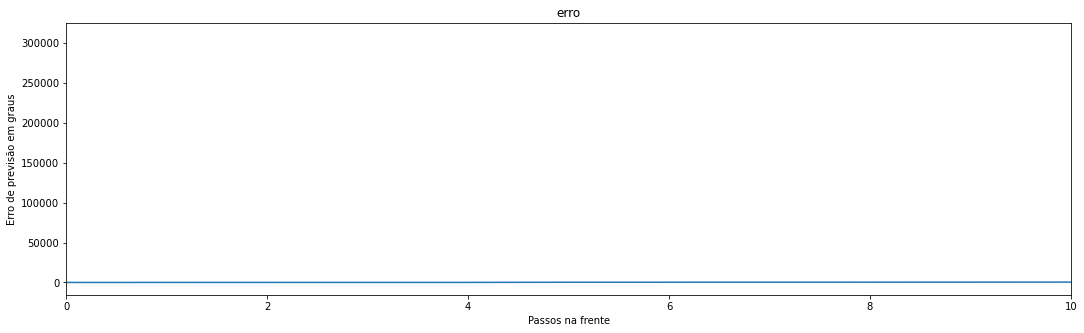

Foi possivel prever até o passo numero 1


In [22]:
passos = 10# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"15.txt",passos)

plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()

cont=0

for k in erro:
    if(k<erroAceitavel):
        cont=cont+1
print("Foi possivel prever até o passo numero "+str(cont))

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 2306
Amostra sorteada: 367
___________________________________________Condições Inicial__________________________________________________________
Posicao dos motores: 
[100.  93.  98. 102.  79.  92.  87.  69.  96.  87.  88.  75.]
Comando dado aos motores: 
[100.  93.  98. 102.  79.  92.  87.  69.  96.  87.  88.  75.]
Giroscópio(GyX, GyY, GyZ): 
[-4.35 82.16  3.02]
Acelerometro(AcX, AcY, AcZ): 
[ 1.67  0.79 -2.58]
Temperatura[i-2]: 
28.11
Ultrassonico[i-2]: 
59.28
Inclinação(x,y,z)[i-2]: 
[-143.98  136.56  -24.6 ]


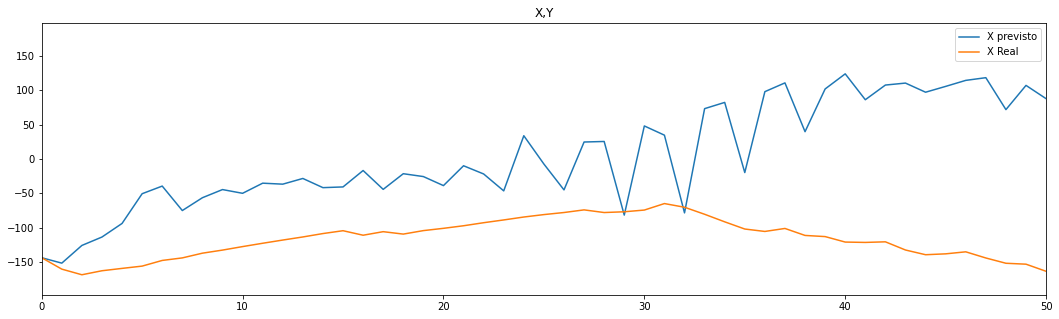

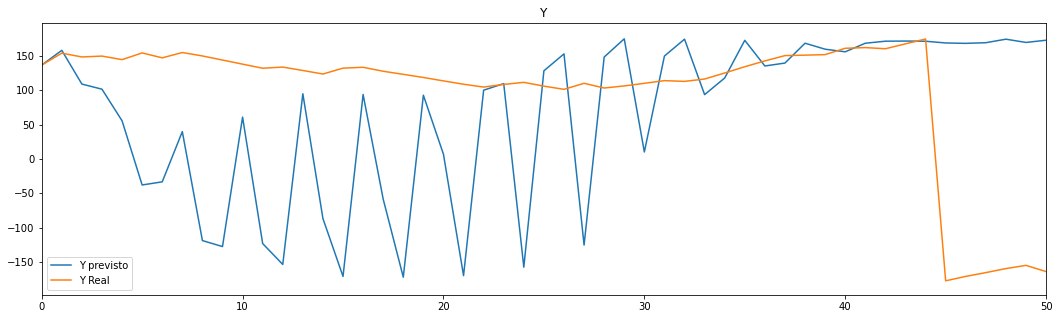

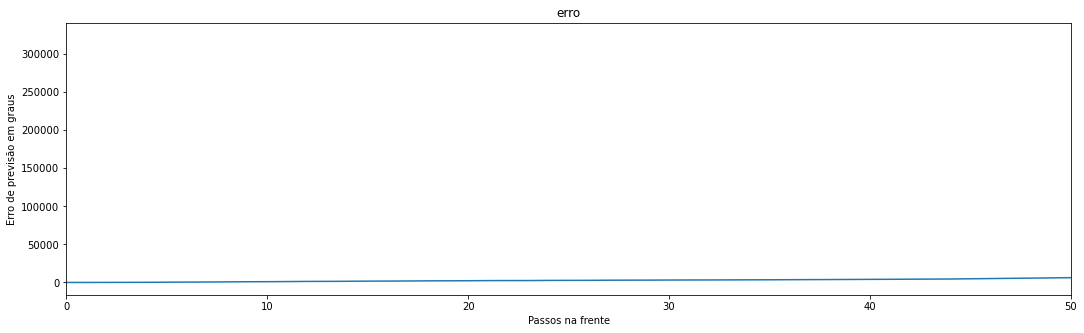

Foi possivel prever até o passo numero 1


In [24]:
passos = 50# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"15.txt",passos)

plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()

cont=0

for k in erro:
    if(k<erroAceitavel):
        cont=cont+1
print("Foi possivel prever até o passo numero "+str(cont))